# Analyse des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
pd.set_option("display.max_rows",200)
sns.set(font_scale=3, rc={'figure.figsize':(15,15)})
from pandas.api.types import CategoricalDtype

In [15]:
my_data = pd.read_csv('my_data.csv', delimiter=',', low_memory=False)

## Analyse univariée  végan/non-végan d'une variable quantitative

In [18]:
def distrib_hue_vegan(data, feature):
    """
        Fonction permettant l'analyse d'une variable quantitative
        
        :param data: Dataframe 
        :param feature: Feature quantitative à analyser
        :type data: DataFrame
        :type feature: str
    """
    sns.set(font_scale=3, rc={'figure.figsize':(15,15)})
    sns.distplot( data[data['vegan']==True][feature] , color="green", label='produits végans')
    sns.distplot( data[data['vegan']==False][feature] , color="red", label='produits non-végans')
    plt.title('Distribution de la feature : ' + feature)
    plt.ylabel('Fréquence')
    plt.legend()
    print(f'La moyenne de la feature {feature} est de {data[data["vegan"]==True][feature].mean():.2f} pour les produits végans.')
    print(f'Sa médiane est de {data[data["vegan"]==True][feature].median():.2f} et son écart-type vaut {data[data["vegan"]==True][feature].std():.2f}.')
    
    print(f'La moyenne de la feature {feature} est de {data[data["vegan"]==False][feature].mean():.2f} pour les produits non végans.')
    print(f'Sa médiane est de {data[data["vegan"]==False][feature].median():.2f} et son écart-type vaut {data[data["vegan"]==False][feature].std():.2f}.')


La moyenne de la feature nutriscore_score est de 6.41 pour les produits végans.
Sa médiane est de 6.00 et son écart-type vaut 7.87.
La moyenne de la feature nutriscore_score est de 11.67 pour les produits non végans.
Sa médiane est de 13.00 et son écart-type vaut 8.79.


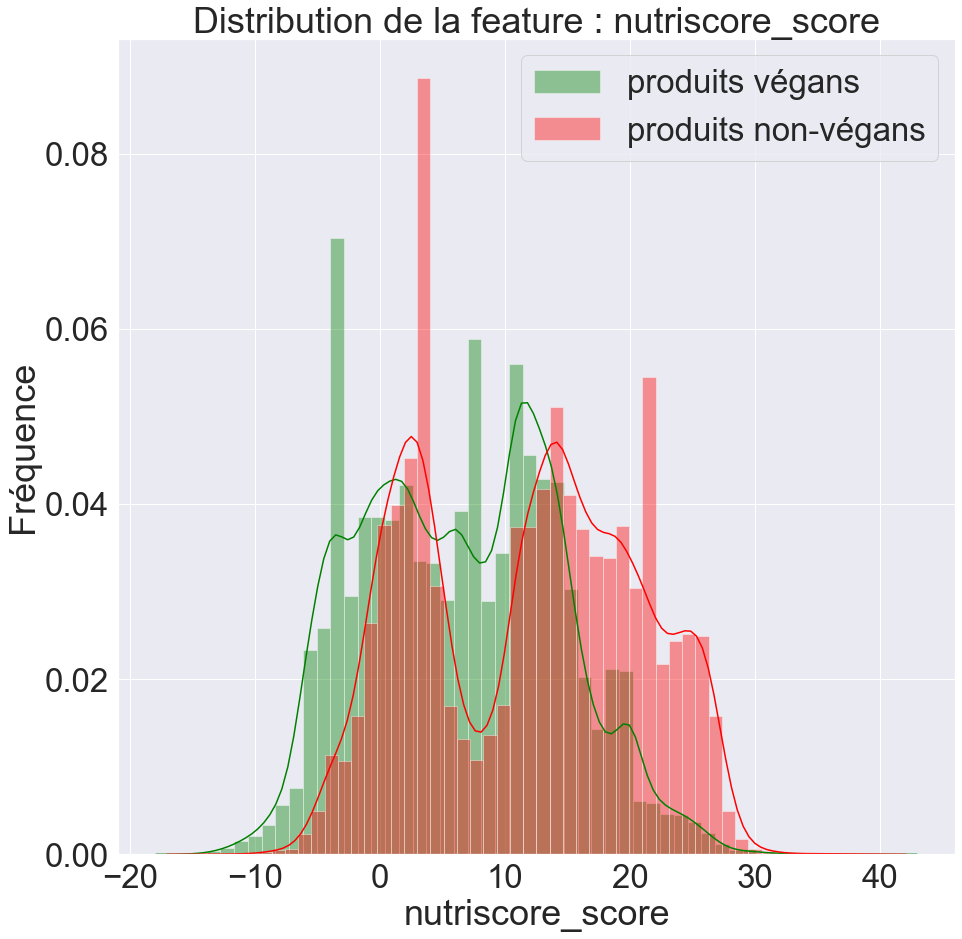

In [20]:
distrib_hue_vegan(my_data, 'nutriscore_score')

C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


La moyenne de la feature nutriscore_score est de 6.42 pour les produits végans.
Sa médiane est de 6.00 et son écart-type vaut 7.89.
La moyenne de la feature nutriscore_score est de 13.11 pour les produits non végans.
Sa médiane est de 14.00 et son écart-type vaut 9.12.


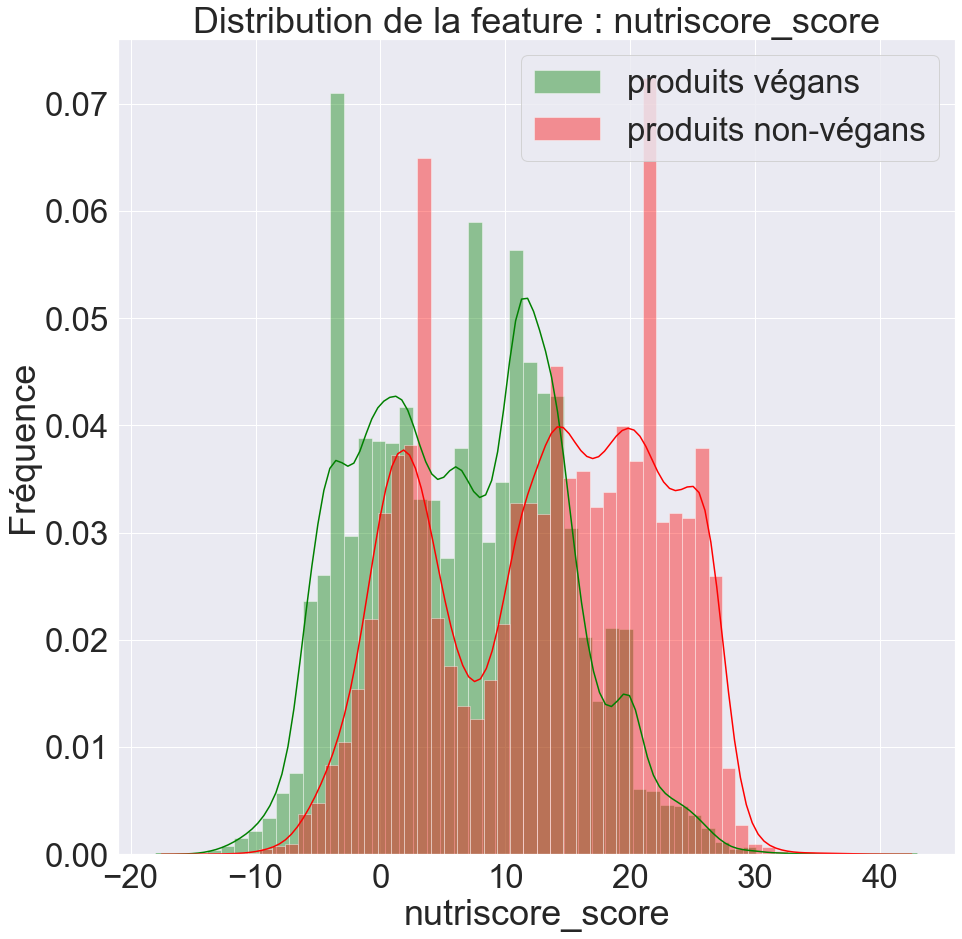

In [19]:
distrib_hue_vegan(my_data[my_data['pnns_groups_1']!='fish meat eggs'][my_data['pnns_groups_1']!='milk and dairy products'], 'nutriscore_score')

## Corrélation variable qualitative/variable quantitative

In [21]:
def quanti_quali_hue_vegan(data, quanti, quali, n_cat):
    cat_list = list(data[quali].value_counts().head(n_cat).index)
    A=data[data[quali].isin(cat_list)]
    sns.boxplot(x=quanti, y=quali, data=A, hue="vegan")

C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


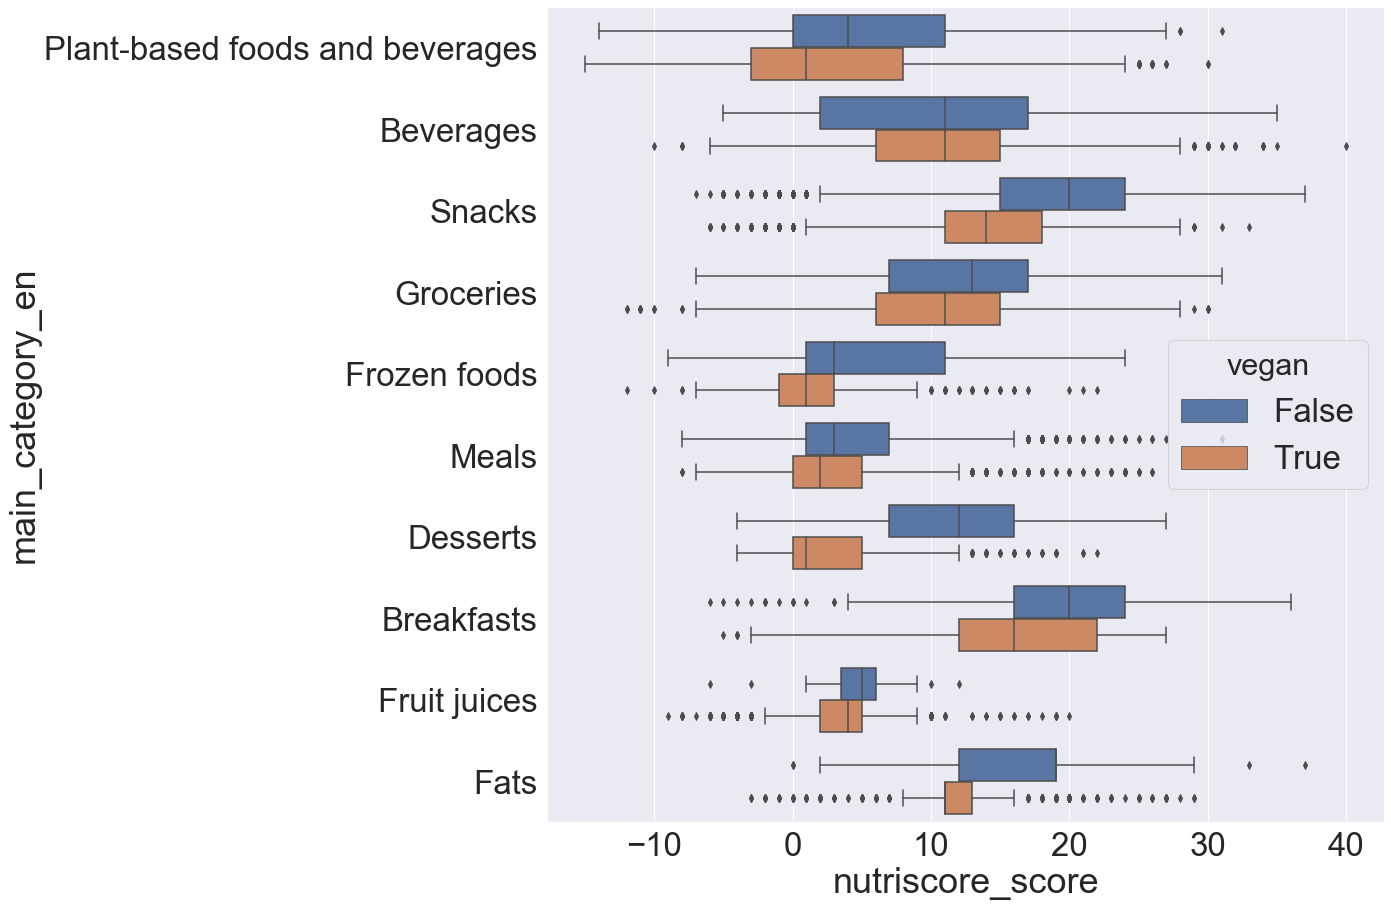

In [22]:
quanti_quali_hue_vegan(my_data[my_data['pnns_groups_1']!='fish meat eggs'][my_data['pnns_groups_1']!='milk and dairy products'], 'nutriscore_score', 'main_category_en', 10)

In [24]:
def quali(data, feature):
    print(data[feature].nunique())
    print(data[feature].unique())
    print(data[feature].value_counts())

## Analyse de deux variables qualitatives : groupe pnns et nutriscore

C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


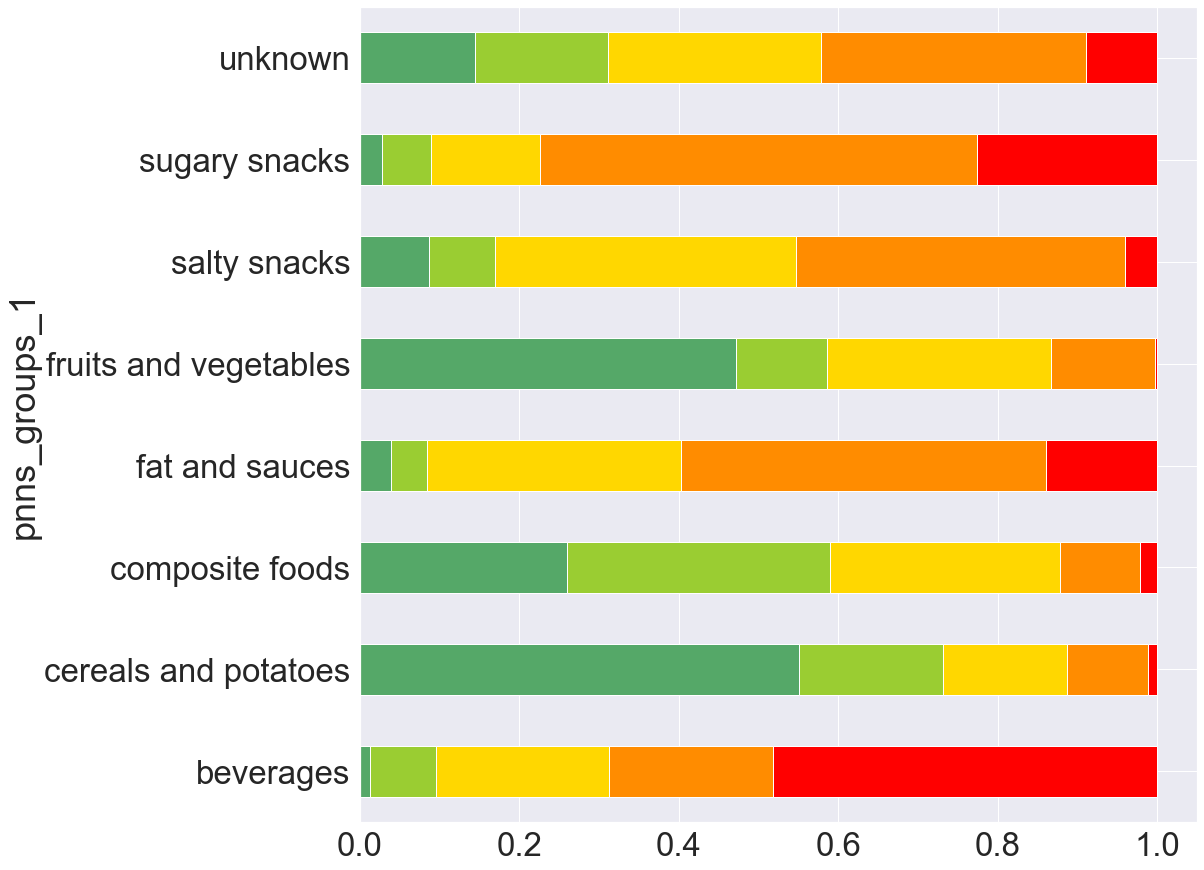

In [25]:
ct_vegan = pd.crosstab(my_data[my_data['vegan']==True][my_data['pnns_groups_1']!='milk and dairy products']['pnns_groups_1'], my_data[my_data['vegan']==True]['nutriscore_grade'], normalize='index')
ct_vegan
ct_vegan.plot.barh(stacked=True, color=['g', 'yellowgreen', 'gold', 'darkorange', 'red'], legend=False)

C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


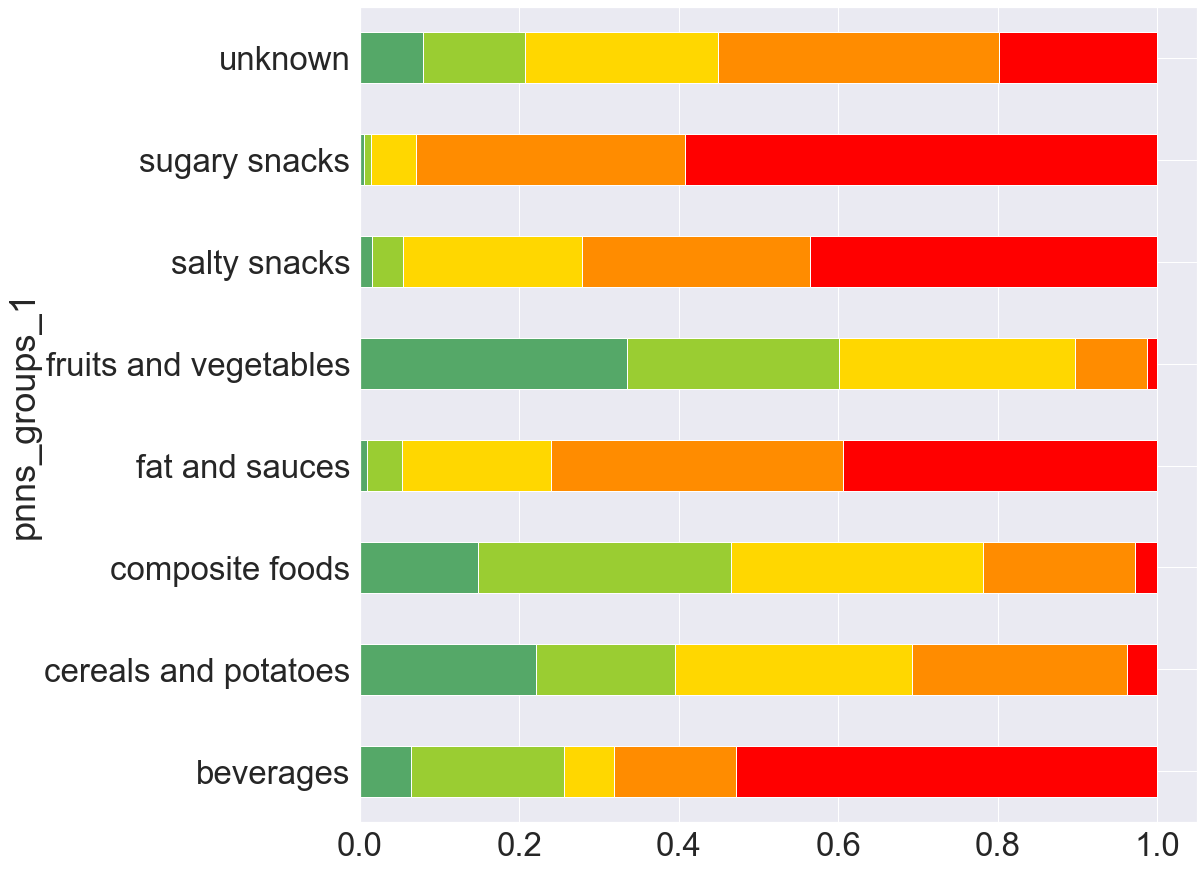

In [26]:
ct_novegan = pd.crosstab(my_data[my_data['vegan']==False][my_data['pnns_groups_1']!='fish meat eggs'][my_data['pnns_groups_1']!='milk and dairy products']['pnns_groups_1'], my_data[my_data['vegan']==False]['nutriscore_grade'], normalize='index')
ct_novegan
ct_novegan.plot.barh(stacked=True, color=['g', 'yellowgreen', 'gold', 'darkorange', 'red'], legend=False)

## Nuage de mots

(-0.5, 799.5, 799.5, -0.5)

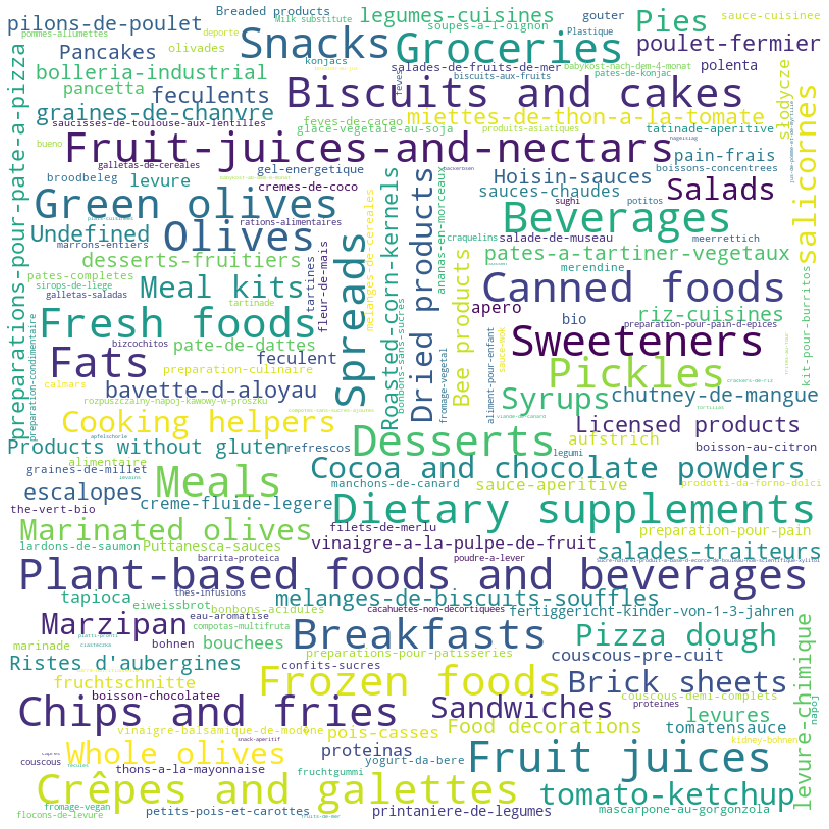

In [27]:
freq = (my_data['main_category_en'][my_data['vegan']==True].value_counts()).to_dict()

clean_freq={}
for key in freq:
    if ':' in key:
        new_key =  key[3:]
        clean_freq[new_key] = freq[key]
    else:
        clean_freq[key] = freq[key]
        
wordcloud = WordCloud(width=800, height=800, margin=0, background_color="white", repeat=False,
              relative_scaling = 0., collocations=False).generate_from_frequencies(clean_freq)
plt.imshow(wordcloud, aspect=1)
plt.axis('off')

(-0.5, 799.5, 799.5, -0.5)

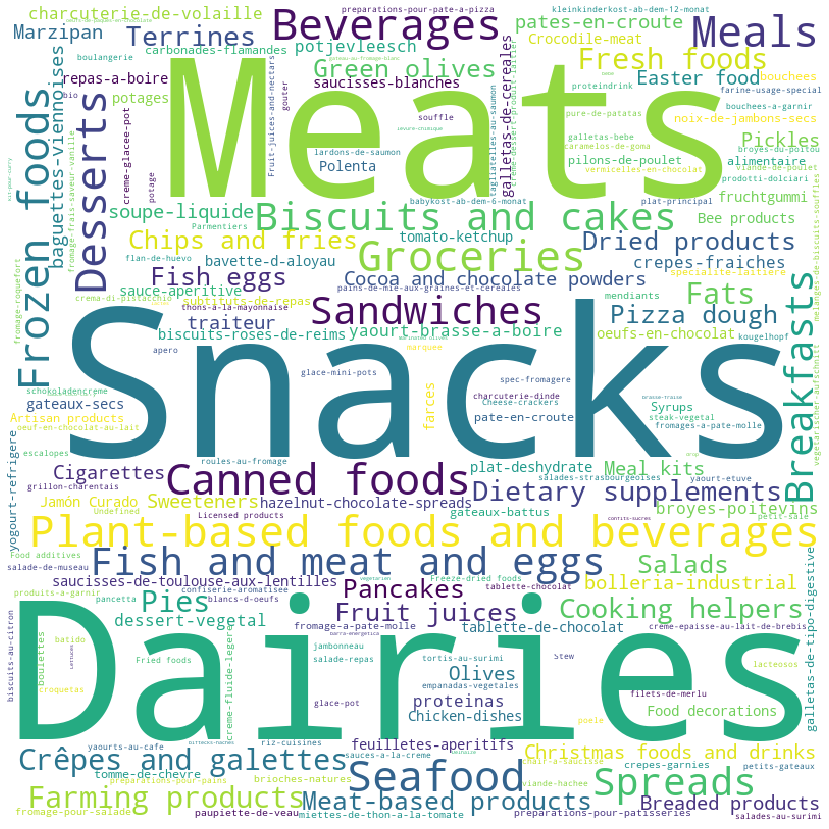

In [28]:
freq = (my_data['main_category_en'][my_data['vegan']==False].value_counts()).to_dict()

clean_freq={}
for key in freq:
    if ':' in key:
        new_key =  key[3:]
        clean_freq[new_key] = freq[key]
    else:
        clean_freq[key] = freq[key]
        
wordcloud = WordCloud(width=800, height=800, margin=0, background_color="white", repeat=False,
                      relative_scaling = 0., collocations=False).generate_from_frequencies(clean_freq)

plt.imshow(wordcloud, aspect=1)
plt.axis('off')

## Corrélation entre plusieurs variables quantitatives

In [29]:
no_vegan_corr = my_data[my_data['vegan']==False][['nutriscore_score', 'energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g']].corr()
vegan_corr = my_data[my_data['vegan']==True][['nutriscore_score', 'energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g']].corr()

Text(0.5, 1, 'Corrélation entre les variables quantitatives retenues sur les produits végans')

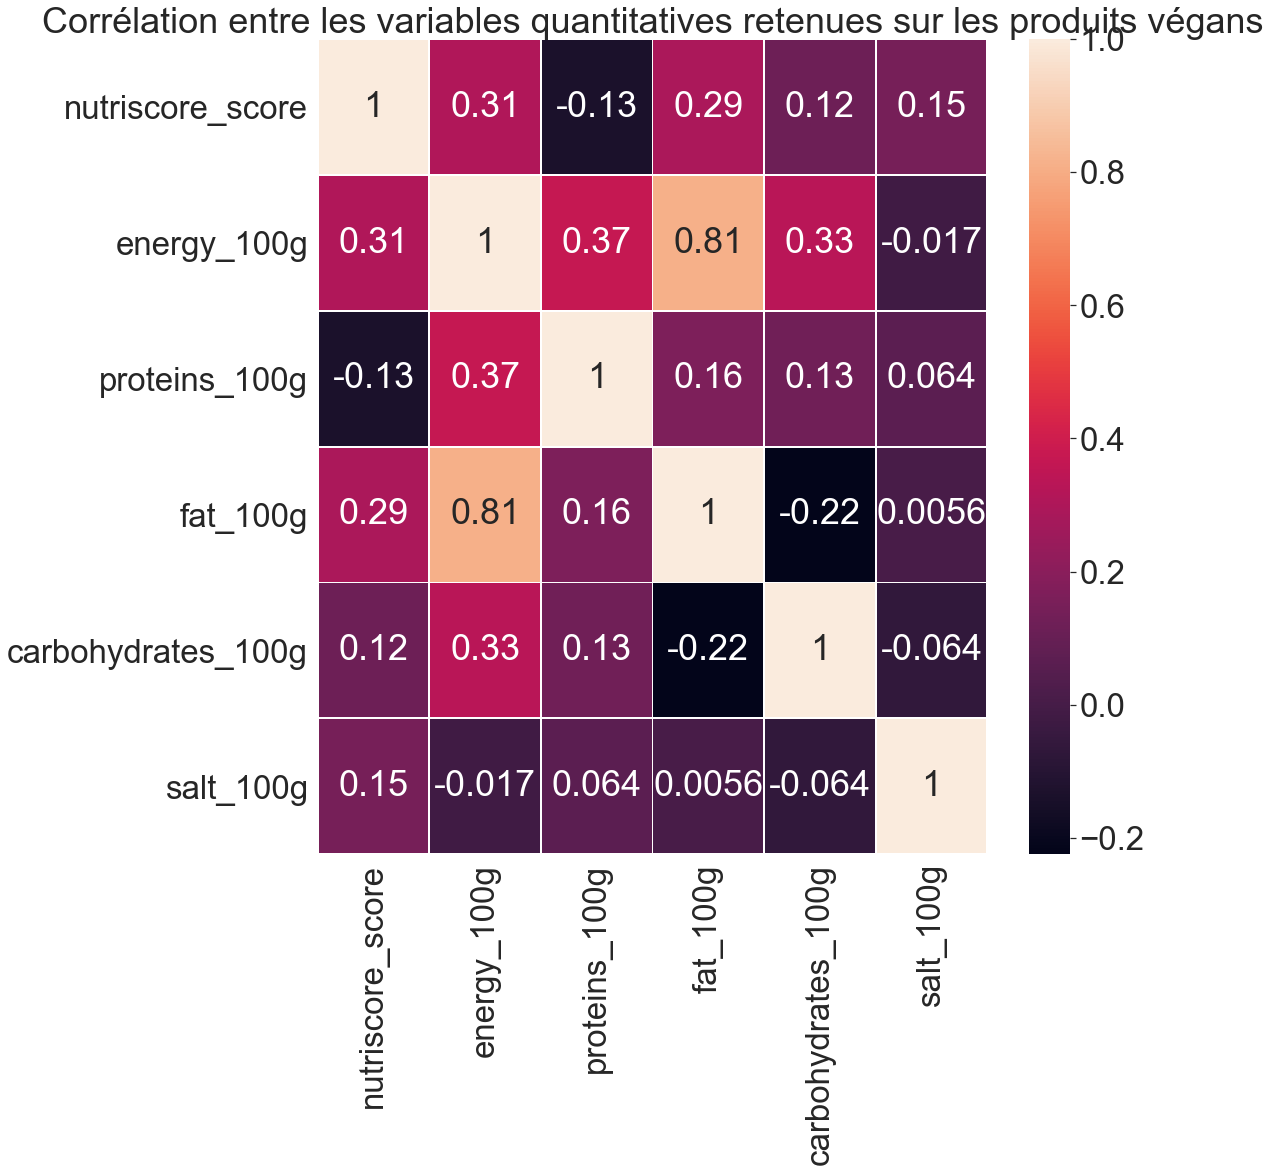

In [30]:
sns.heatmap(vegan_corr,annot=True,linewidth=0.9)
plt.title('Corrélation entre les variables quantitatives retenues sur les produits végans')

C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


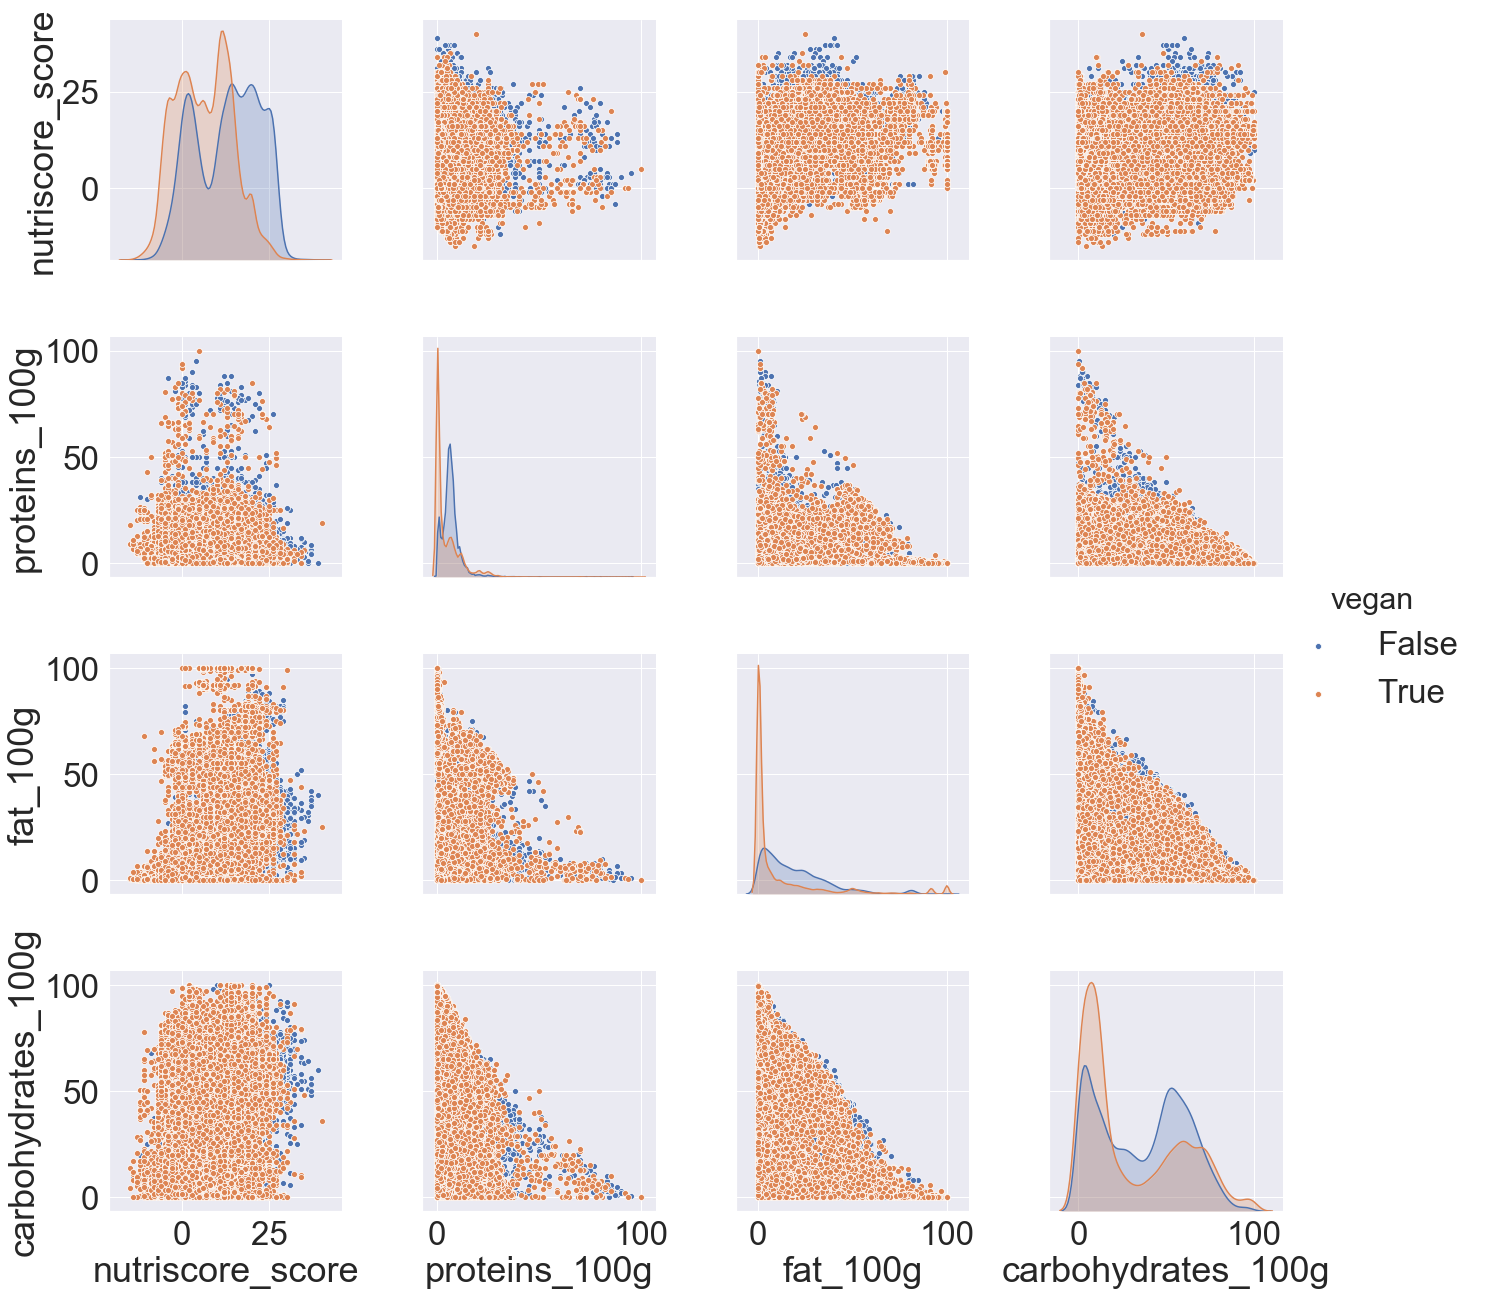

In [31]:
sns.pairplot(data=my_data[my_data['pnns_groups_1']!='fish meat eggs'][my_data['pnns_groups_1']!='milk and dairy products'], hue='vegan', vars=['nutriscore_score', 'proteins_100g', 'fat_100g', 'carbohydrates_100g'], height=4.5)

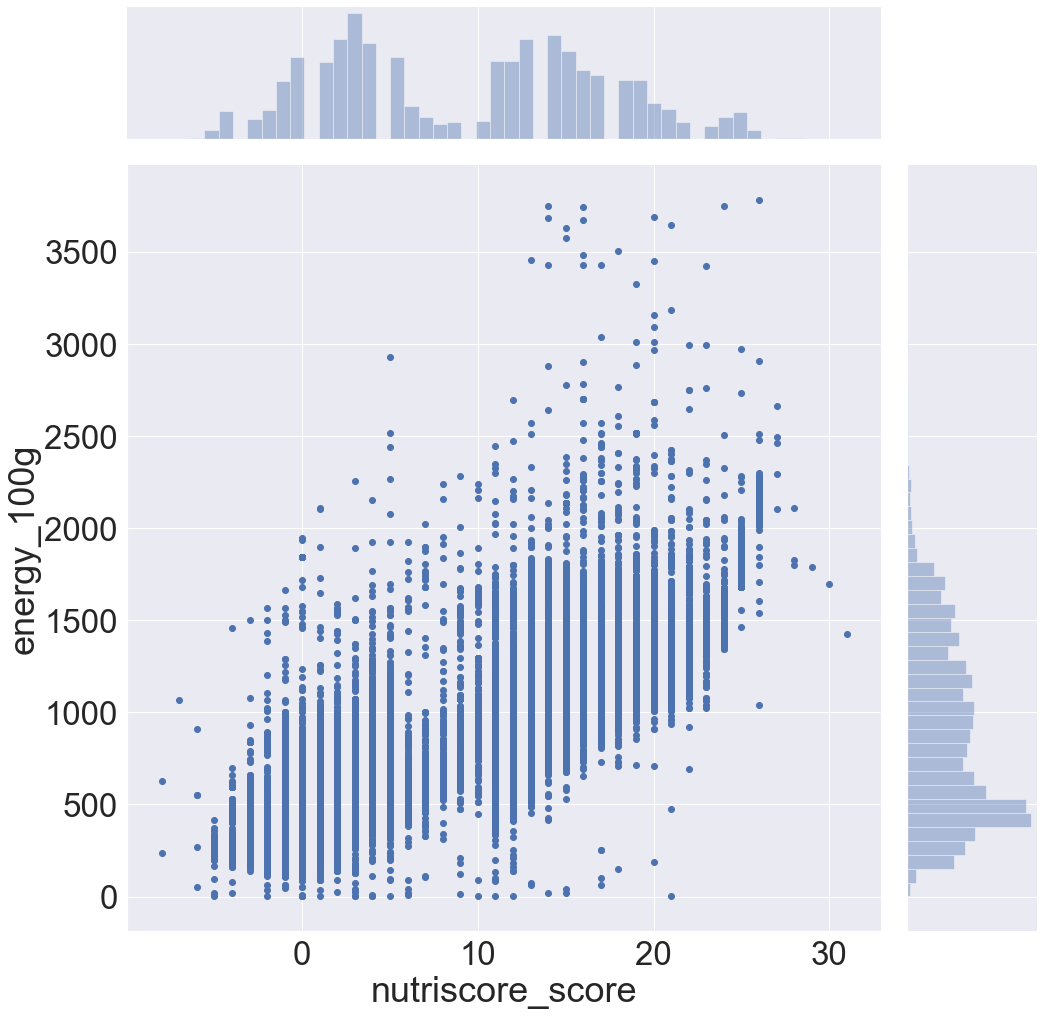

In [55]:
sns.jointplot(y='energy_100g', x='nutriscore_score', data=pas_vegan, height=15)

C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


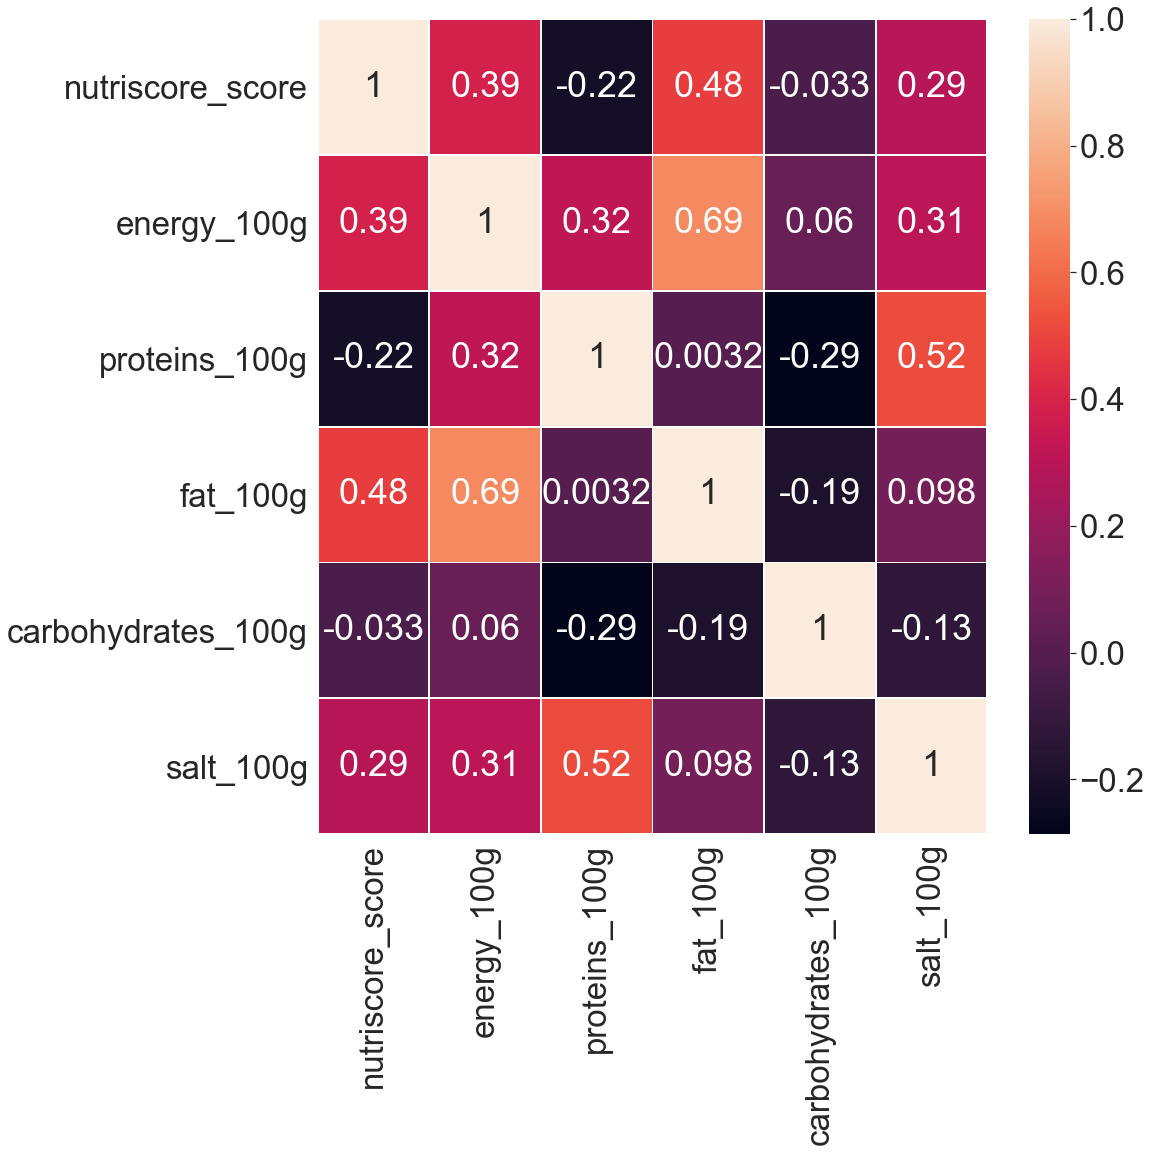

In [38]:
fromage_corr = my_data[my_data['pnns_groups_2']=='Cheese'][my_data['nutriscore_grade']<='b']\
[['nutriscore_score', 'energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g']].corr()
sns.heatmap(fromage_corr,annot=True,linewidth=0.9)

C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


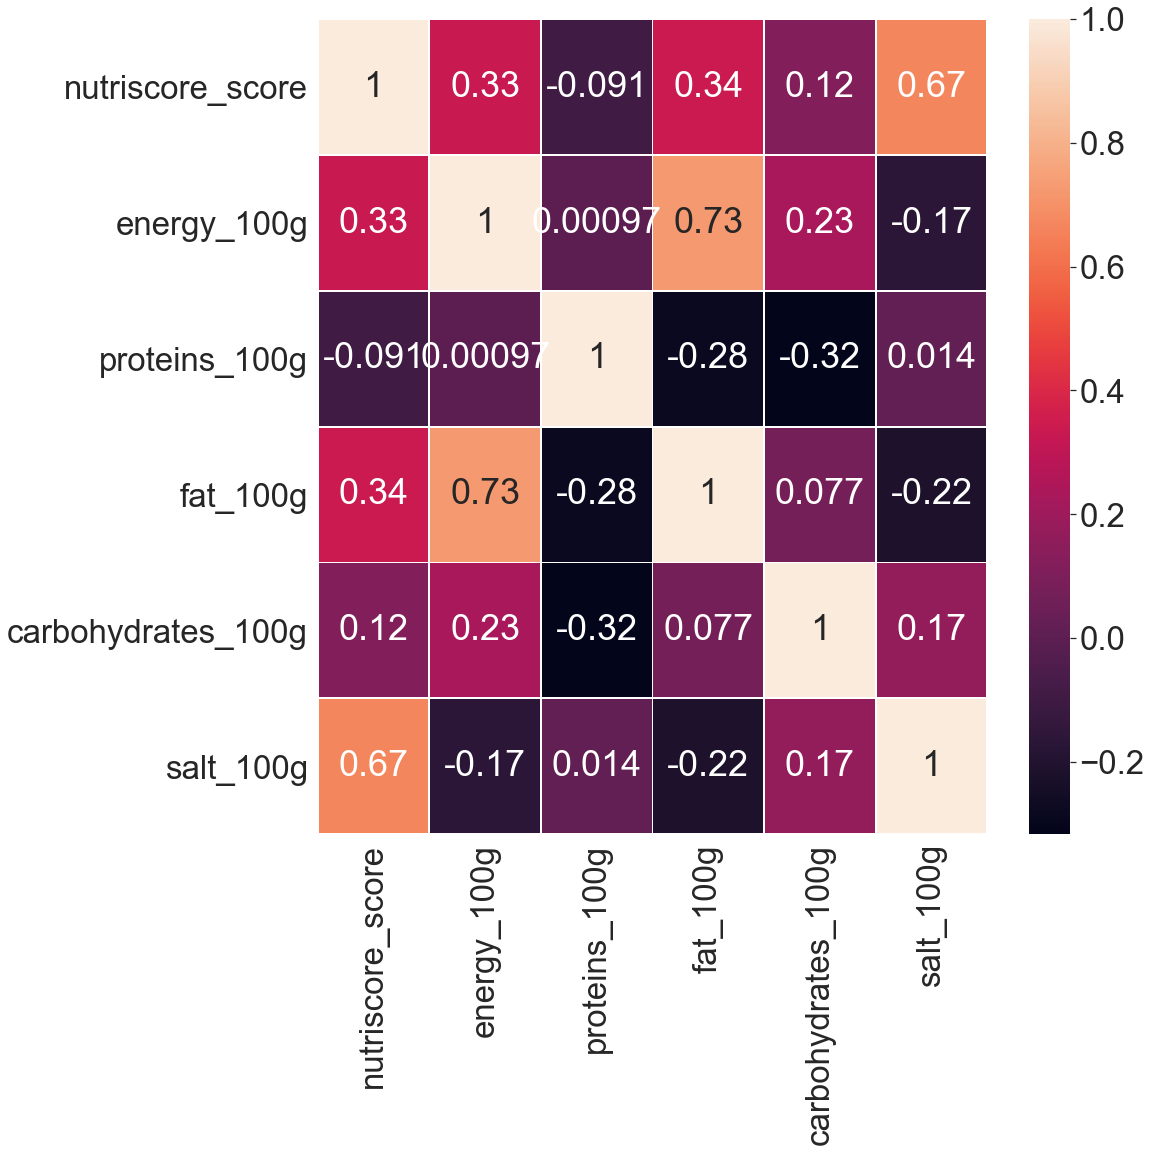

In [40]:
viande_corr = my_data[my_data['pnns_groups_1']=='fish meat eggs'][my_data['nutriscore_grade']<='b']\
[['nutriscore_score', 'energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g']].corr()
sns.heatmap(viande_corr,annot=True,linewidth=0.9)

C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


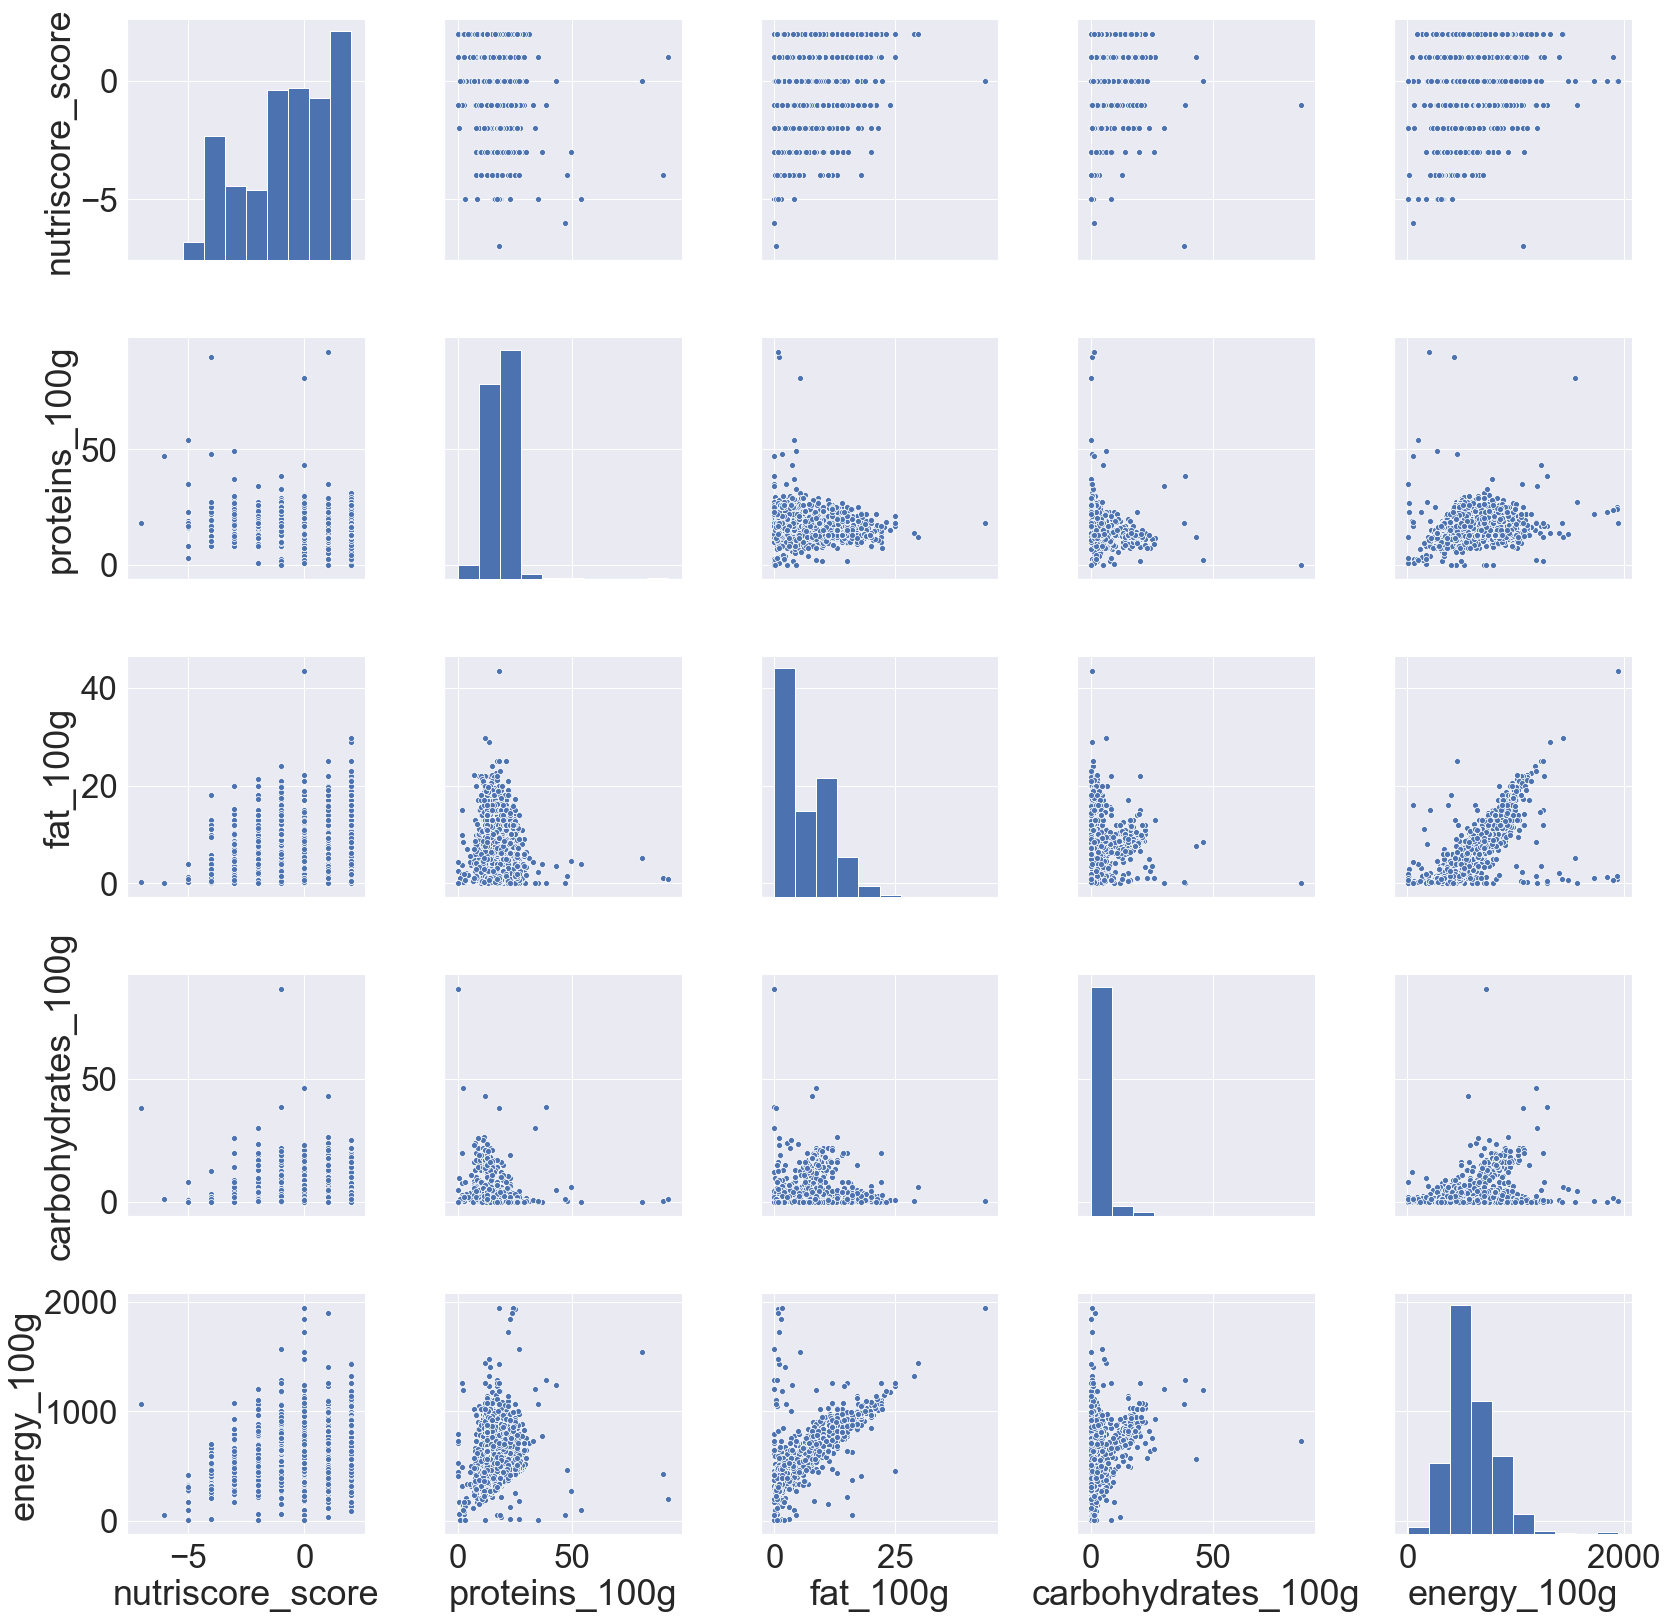

In [41]:
sns.pairplot(data=my_data[my_data['pnns_groups_1']=='fish meat eggs'][my_data['nutriscore_grade']<='b'], vars=['nutriscore_score', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'energy_100g'], height=4.5)

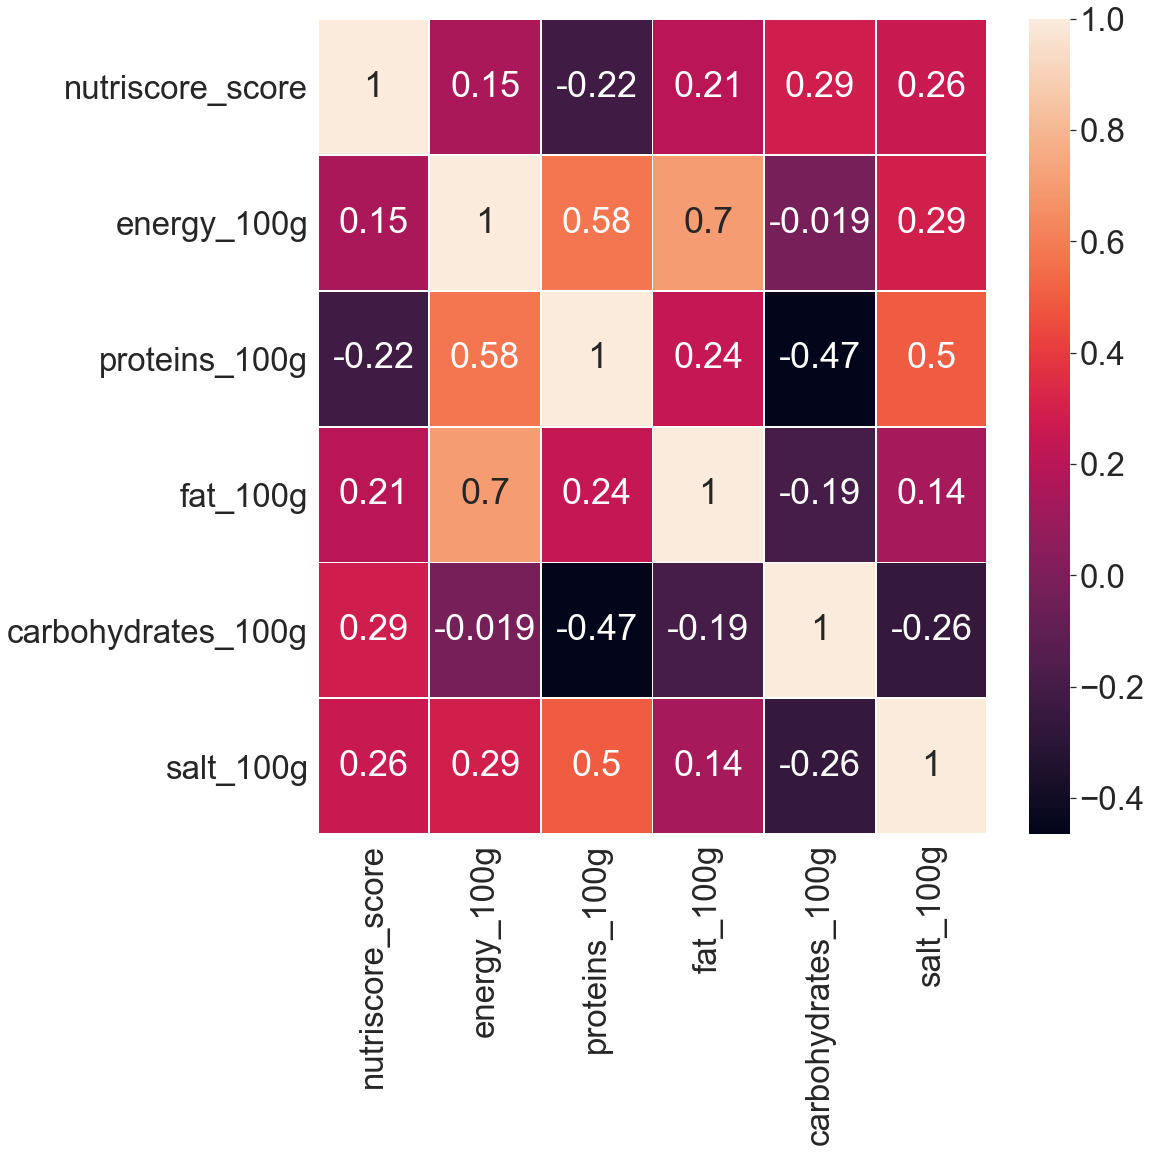

In [51]:
pas_vegan_corr = pas_vegan[pas_vegan['nutriscore_grade']<='b'][['nutriscore_score', 'energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g']].corr()
sns.heatmap(pas_vegan_corr,annot=True,linewidth=0.9)

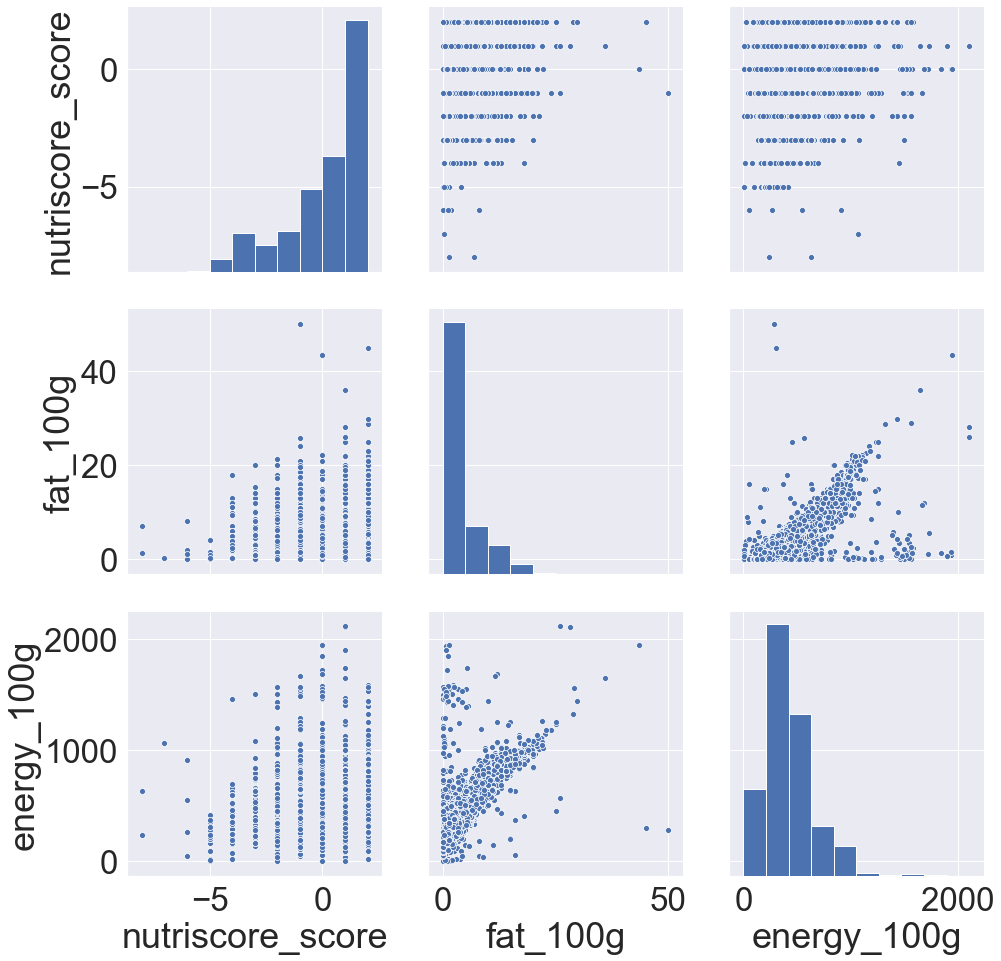

In [52]:
sns.pairplot(data=pas_vegan[pas_vegan['nutriscore_grade']<='b'], vars=['nutriscore_score', 'fat_100g', 'energy_100g'], height=4.5)

## Pieplots

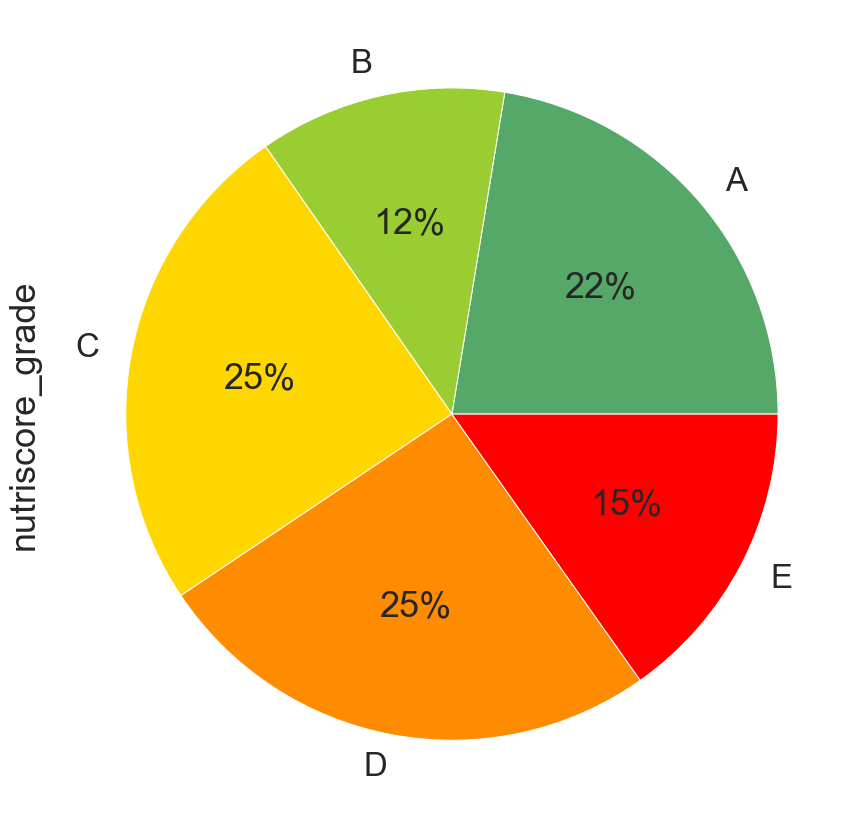

In [32]:
my_data[my_data['vegan']==True]['nutriscore_grade'].value_counts().sort_index().rename(index={'a':'A', 'b':'B', 'c':'C', 'd':'D', 'e':'E'}).\
plot(kind='pie',colors=['g', 'yellowgreen', 'gold', 'darkorange', 'red'],  autopct='%1.0f%%')

C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Non vegan')

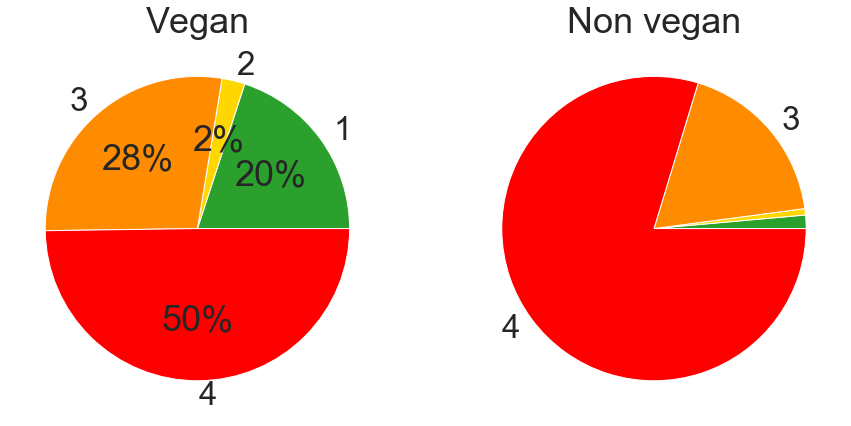

In [33]:
plt.subplot(1, 2, 1)
my_data[my_data['vegan']==True]['nova_group'].value_counts().sort_index().\
plot(kind='pie',colors=['tab:green', 'gold', 'darkorange', 'red'],  autopct='%1.0f%%', labels=['1','2','3','4'])
plt.axis('off')
plt.title('Vegan')

plt.subplot(1, 2, 2)
my_data[my_data['vegan']==False][my_data['pnns_groups_1']!='fish meat eggs']\
[my_data['pnns_groups_1']!='milk and dairy products']['nova_group'].value_counts().sort_index().\
plot(kind='pie',colors=['tab:green','gold', 'darkorange', 'red'], labels=['','','3','4'])#,  autopct='%1.0f%%', labels=['1','2','3','4'])
plt.axis('off')
plt.title('Non vegan')

## Recherche d'un produit végan alternatif

In [59]:
def recherche(data, code):
    
    group = data[data['code']==code]['pnns_groups_1'].values[0]
    category = data[data['code']==code]['main_category_en'].values[0]
    grade =  data[data['code']==code]['nutriscore_grade'].values[0]
    nova = data[data['code']==code]['nova_group'].values[0]
    index = data[data['code']==code].index[0]

                    #my_data[my_data['pnns_groups_1'].isin(['fish meat eggs','milk and dairy products'])]                                 
    #if (data[data['code']==code]['pnns_groups_1'] != 'fish meat eggs').bool():
    if ~(data[data['code']==code]['pnns_groups_1'].isin(['fish meat eggs', 'milk and dairy products']).bool()):
           
        AAA = data[data['vegan']==True][data['pnns_groups_1']==group]\
        [data['main_category_en']==category]
        #print(AAA)
        new_index = AAA[AAA['nutriscore_grade'] <= grade][AAA['nova_group']<=nova].index
    #    new_index = AAA[AAA['nutriscore_grade'] <= data[data['code']==code]['nutriscore_grade']]\
     #                   [AAA['nova_group']<=data[data['code']==code]['nova_group']].index
        

        
        return new_index
        
    else:
        AAA = data[data['vegan']==True]     
        new_index = AAA[AAA['salt_100g'].between(2/3*data.loc[index]['salt_100g'], 4/3*data.loc[index]['salt_100g']) \
        & AAA['proteins_100g'].between(2/3*data.loc[index]['proteins_100g'], 4/3*data.loc[index]['proteins_100g'])\
        #& AAA['sugars_100g'].between(0.9*data.loc[index]['sugars_100g'], 1.1*data.loc[index]['sugars_100g'])\
        & AAA['carbohydrates_100g'].between(2/3*data.loc[index]['carbohydrates_100g'], 4/3*data.loc[index]['carbohydrates_100g'])\
        #& AAA['saturated-fat_100g'].between(0.9*data.loc[index]['saturated-fat_100g'], 1.1*data.loc[index]['saturated-fat_100g'])\
        & AAA['fat_100g'].between(2/3*data.loc[index]['fat_100g'], 4/3*data.loc[index]['fat_100g'])\
        & AAA['energy_100g'].between(2/3*data.loc[index]['energy_100g'], 4/3*data.loc[index]['energy_100g'])
            ].index

        return new_index

In [62]:
#recherche(my_data, '0000000005470')
#new_data.loc[62]
my_data.loc[recherche(my_data, '0000000005470')]

C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


code                                        brands_tags  \
137          00084260                         by-sainsbury-s,sainsbury-s   
219     0013764027138                                dave-s-killer-bread   
356          00174923                                                m-s   
368     0018627703174                                              kashi   
468     0024094070343  de-cecco,f-lli-de-cecco-di-filippo-fara-s-mart...   
...               ...                                                ...   
104896  9300652010374                                         sanitarium   
104940  9310055536340                                           kelloggs   
104967  9310155009553                                           san-remo   
105098  9421901881139                                              pic-s   
105138  9556041130660                                               ayam   

       nutriscore_grade  nova_group         pnns_groups_1      pnns_groups_2  \
137                   a         1.0  cereals and potatoes            Cereals   
219                   a         4.0  cereals and potatoes              Bread   
356                   a         4.0  cereals and potatoes              Bread   
368                   a         4.0  cereals and potatoes            Cereals   
468                   a         1.0  cereals and potatoes            Cereals   
...                 ...         ...                   ...                ...   
104896                a         3.0  cereals and potatoes  Breakfast cereals   
104940                a         4.0  cereals and potatoes  Breakfast cereals   
104967                a         3.0  cereals and potatoes            Cereals   
105098                a         1.0  cereals and potatoes            Legumes   
105138                a         3.0  cereals and potatoes            Cereals   

                       main_category_en  vegan  nutriscore_score  salt_100g  \
137     Plant-based foods and beverages   True              -3.0     0.0100   
219     Plant-based foods and beverages   True              -2.0     0.5000   
356     Plant-based foods and beverages   True              -1.0     0.9500   
368     Plant-based foods and beverages   True              -3.0     0.0000   
468     Plant-based foods and beverages   True              -4.0     0.0000   
...                                 ...    ...               ...        ...   
104896  Plant-based foods and beverages   True              -5.0     0.2700   
104940  Plant-based foods and beverages   True              -1.0     0.5250   
104967  Plant-based foods and beverages   True              -1.0     0.0300   
105098  Plant-based foods and beverages   True              -1.0     0.0225   
105138  Plant-based foods and beverages   True              -2.0     0.4100   

        proteins_100g  sugars_100g  carbohydrates_100g  saturated-fat_100g  \
137               5.1         1.50                32.5                 0.1   
219              12.0        12.00                45.0                 0.0   
356              10.2         2.20                46.4                 0.8   
368              11.5        14.80                78.7                 0.0   
468              12.5         1.79                73.2                 0.0   
...               ...          ...                 ...                 ...   
104896           12.4         3.30                67.0                 0.6   
104940            7.7         7.70                81.3                 0.1   
104967            8.0         2.00                76.5                 0.5   
105098           30.3         5.70                 9.6                 6.3   
105138           10.0         0.00                29.0                 0.1   

        fat_100g  energy_100g  
137         0.70        669.0  
219         4.00        920.0  
356         3.80       1188.0  
368         1.64       1370.0  
468         1.79       1490.0  
...          ...          ...  
104896      1.30       1498.0  
1

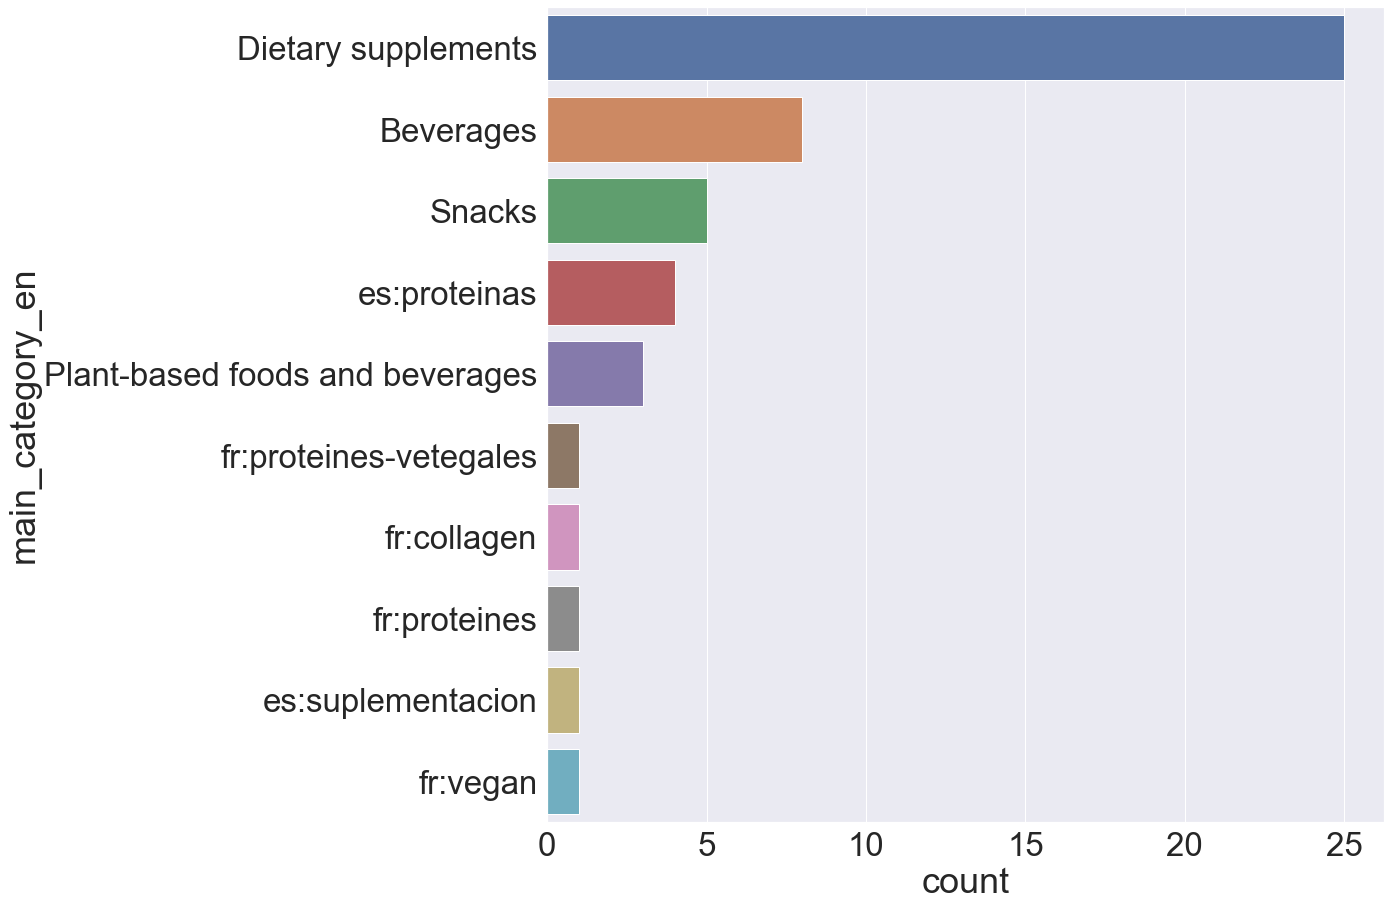

In [42]:
sns.countplot(y=my_data.loc[my_data[my_data['vegan']==True]['proteins_100g'].sort_values(ascending=False).head(50).index]['main_category_en'], order = my_data.loc[my_data[my_data['vegan']==True]['proteins_100g'].sort_values(ascending=False).head(50).index]['main_category_en'].value_counts().index)

In [44]:
my_data.loc[my_data[my_data['vegan']==True]['proteins_100g'].sort_values(ascending=False).head(100).index]['main_category_en'].value_counts()

Dietary supplements                66
Beverages                          10
Snacks                             10
es:proteinas                        4
Plant-based foods and beverages     3
Groceries                           1
fr:proteines-vetegales              1
fr:collagen                         1
es:suplementacion                   1
fr:proteines                        1
Crêpes and galettes                 1
fr:vegan                            1
Name: main_category_en, dtype: int64

In [47]:
pas_vegan = my_data[my_data['pnns_groups_1'].isin(['fish meat eggs','milk and dairy products'])]

[Text(0.5, 0, '')]

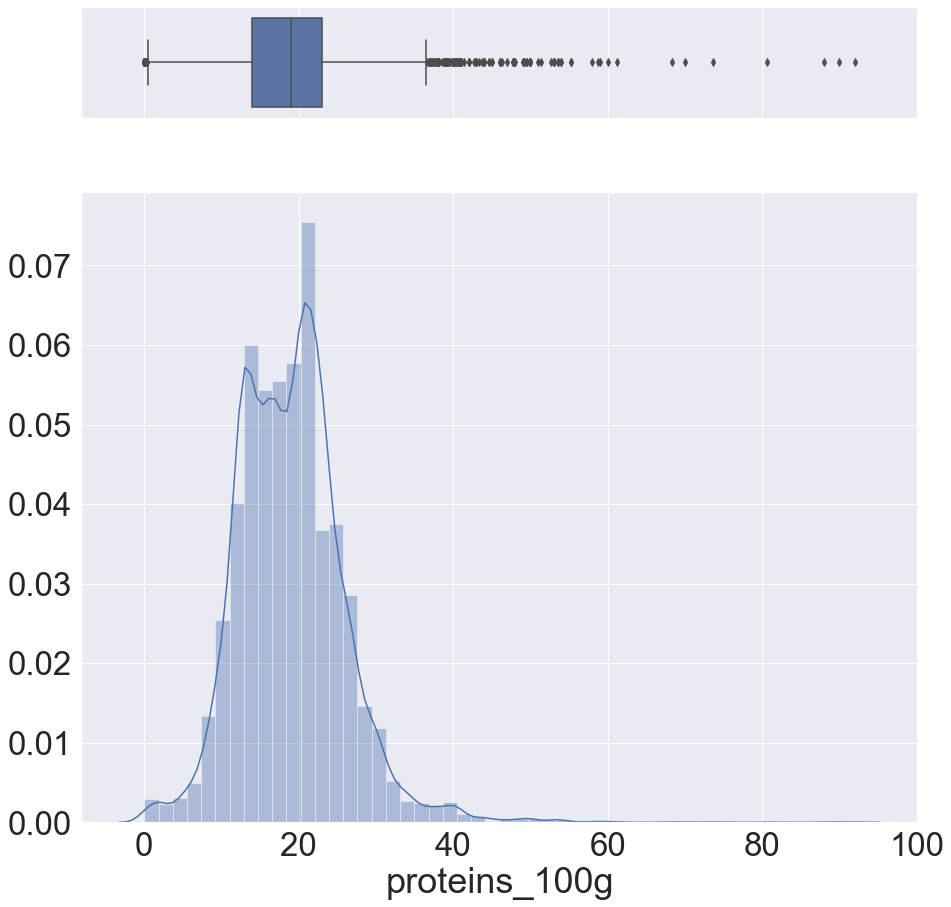

In [48]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
sns.boxplot(pas_vegan[pas_vegan['pnns_groups_1']=='fish meat eggs']['proteins_100g'], ax=ax_box)
sns.distplot(pas_vegan[pas_vegan['pnns_groups_1']=='fish meat eggs']["proteins_100g"], ax=ax_hist)
 
ax_box.set(xlabel='')


In [49]:
prot_vegan = my_data.loc[my_data[my_data['vegan']==True]['proteins_100g'].sort_values(ascending=False).head(30).index]

[Text(0.5, 0, '')]

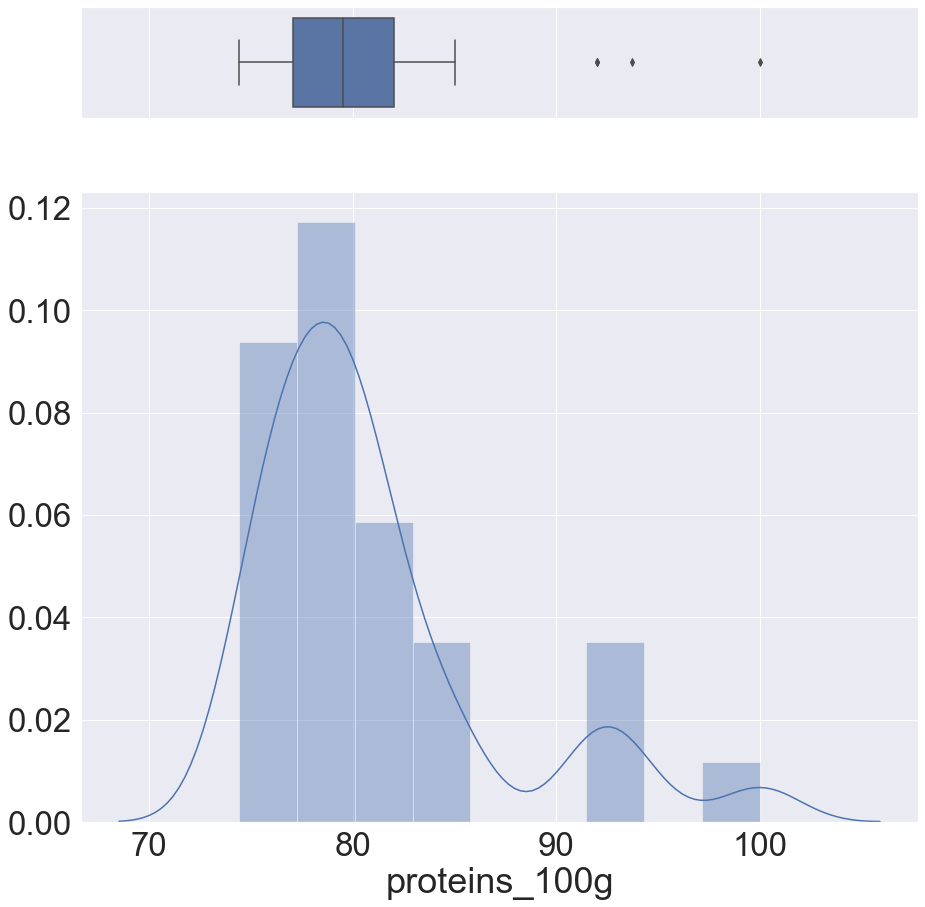

In [50]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
sns.boxplot(prot_vegan['proteins_100g'], ax=ax_box)
sns.distplot(prot_vegan["proteins_100g"], ax=ax_hist)
 
ax_box.set(xlabel='')


In [69]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

anova_ = smf.ols('nutriscore_score~energy_100g', data=pas_vegan[pas_vegan['nutriscore_grade']<='b']).fit()
print(anova_.summary())
sm.stats.anova_lm(anova_)

                            OLS Regression Results                            
Dep. Variable:       nutriscore_score   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           6.71e-30
Time:                        10:07:26   Log-Likelihood:                -12166.
No. Observations:                5879   AIC:                         2.434e+04
Df Residuals:                    5877   BIC:                         2.435e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.6608      0.052    -12.688      

df        sum_sq     mean_sq           F        PR(>F)
energy_100g     1.0    479.304485  479.304485  130.458127  6.712872e-30
Residual     5877.0  21592.157669    3.674010         NaN           NaN